In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve


DataPath_1='./Data/Suppl_Data_FS11_Stoch_BBBm'
DataPath_2='./Data/Suppl_Data_FS11_Stoch_BBBm_dec'
DataPath_3='./Data/Suppl_Data_FS11_Stoch_BBBm_short'
DataPath_4='./Data/Suppl_Data_FS11_Stoch_BBBm_long'

%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath_1):
    os.makedirs(DataPath_1)
if not os.path.isfile(DataPath_1+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS11_Stoch_BBBm_N60.ipynb
if not os.path.isdir(DataPath_2):
    os.makedirs(DataPath_2)
if not os.path.isfile(DataPath_2+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS11_Stoch_BBBm_dec_N60.ipynb
if not os.path.isdir(DataPath_3):
    os.makedirs(DataPath_3)
if not os.path.isfile(DataPath_3+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS11_Stoch_BBBm_short_N60.ipynb
if not os.path.isdir(DataPath_4):
    os.makedirs(DataPath_4)
if not os.path.isfile(DataPath_4+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS11_Stoch_BBBm_long_N60.ipynb

  0%|          | 0/60 [00:00<?, ?it/s]

Data not found. Running Data Generation script


  0%|          | 0/60 [00:00<?, ?it/s]

Data not found. Running Data Generation script


  0%|          | 0/60 [00:00<?, ?it/s]

Data not found. Running Data Generation script


  0%|          | 0/60 [00:00<?, ?it/s]

Data not found. Running Data Generation script


100%|██████████| 60/60 [00:59<00:00,  1.01it/s]


In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_5examples = [viridis(0.0)[0:3],viridis(0.3)[0:3],viridis(0.55)[0:3],viridis(0.75)[0:3],viridis(0.95)[0:3]]
alpha_value=0.45
marker_sizer=2.5
dt_vis=30


h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

# Fig S11B top

In [4]:
##### Calculating latent period duration for 4 simulated intensities: matched input intensity; decreased via lowering concentration; decreased via shortening; increased via prolongation #####
N=60

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_sim=day_first_seiz
LP_mean=np.mean(day_first_seiz)   
LP_sem=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simdec=day_first_seiz
LP_mean_dec=np.mean(day_first_seiz)   
LP_sem_dec=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_3+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simshort=day_first_seiz
LP_mean_short=np.mean(day_first_seiz)   
LP_sem_short=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_4+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simlong=day_first_seiz
LP_mean_long=np.mean(day_first_seiz)   
LP_sem_long=np.std(day_first_seiz)/np.sqrt(N)

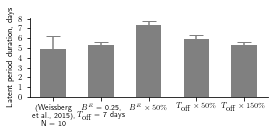

In [5]:
data = load_animal_model_data('Weissberg_et_al_2015')

fig, ax = plt.subplots()
vec=np.array([1,2,3,4,5])
plt.bar(np.array(vec),np.array([data['LatentPeriod_mean'], LP_mean, LP_mean_dec, LP_mean_short, LP_mean_long]), color='grey',
       yerr=[data['LatentPeriod_sem'],LP_sem, LP_sem_dec, LP_sem_short, LP_sem_long],
       align='center',
       alpha=1,
       ecolor='grey',
       capsize=10/3*2,width=0.8/3*2)

plt.xticks(np.array(vec), ['(Weissberg \n et al., 2015),\n N = 10',
                             r"$B^E$ = 0.25,""\n" r"$T_\textnormal{off}$ = 7 days",
                             r"$B^E \times 50\%$",
                             r"$T_\textnormal{off} \times 50\%$",
                             r"$T_\textnormal{off} \times 150\%$"], fontsize=7.5)

plt.yticks(np.arange(0,9))
plt.ylabel('Latent period duration, days')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(3*w,w)
fig.savefig('Figures/Supplementary/Fig_S11B_top.pdf')

In [6]:
## STATISTICS U TEST:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(day_first_seiz_sim, day_first_seiz_simdec,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(day_first_seiz_sim, day_first_seiz_simshort,alternative='two-sided')
print('Statistics SHORT=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(day_first_seiz_sim, day_first_seiz_simlong,alternative='two-sided')
print('Statistics LONG=%.3f, p=%.3f' % (stat, p))
print(p)

# plt.hist(day_first_seiz_sim,edgecolor='k',alpha=0.25)
# plt.hist(day_first_seiz_simdec,alpha=0.25)
# plt.hist(day_first_seiz_simlong,alpha=0.25)
# plt.hist(day_first_seiz_simshort,alpha=0.25)

Statistics DEC=1093.000, p=0.000
0.00017687600793497033
Statistics SHORT=1714.500, p=0.650
0.650100685427575
Statistics LONG=1800.000, p=0.998
0.9978671566442143


# Fig S11B bottom

In [7]:
##### Calculating seizure frequency on days 4-32 for 4 simulated intensities: matched input intensity; decreased via lowering concentration; decreased via shortening; increased via prolongation #####
N=60
day_0=4
day_end=32

for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_sim=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
avg_num_seiz_per_day[day_0-1:day_end]
SeizFr_sem=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simdec=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_dec=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_dec=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_3+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simshort=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_short=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_short=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_4+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simlong=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_long=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_long=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)

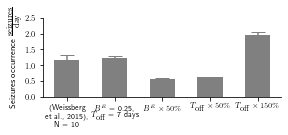

In [8]:
data = load_animal_model_data('Weissberg_et_al_2015')

fig, ax = plt.subplots()

vec=np.array([1,2,3,4,5])
plt.bar(vec,np.array([data['Seizure_freq_mean'], SeizFr_mean,SeizFr_mean_dec,SeizFr_mean_short,SeizFr_mean_long]), color='grey',
       yerr=[data['Seizure_freq_sem'],SeizFr_sem,SeizFr_sem_dec,SeizFr_sem_short,SeizFr_sem_long],
       align='center',
       alpha=1,
       ecolor='grey',
       capsize=10/3*2,width=0.8/3*2)

plt.xticks(np.array(vec), ['(Weissberg \n et al., 2015),\n N = 10',
                             r"$B^E$ = 0.25,""\n" r"$T_\textnormal{off}$ = 7 days",
                             r"$B^E \times 50\%$",
                             r"$T_\textnormal{off} \times 50\%$",
                             r"$T_\textnormal{off} \times 150\%$"], fontsize=7.5)

plt.yticks(np.arange(0,3,0.5))

plt.ylabel(r"Seizures occurrence $\frac{\textnormal{seizures}}{\textnormal{day}}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(3*w,w)
fig.savefig('Figures/Supplementary/Fig_S11B_bottom.pdf')

In [9]:
## STATISTICS U TEST:
from scipy.stats import mannwhitneyu

## calculating seiz freq per simulation for 4 different simulation injuries intensitites
SeizFr_mean_ProSim=np.mean(num_seiz_at_days_sim[:,day_0-1:day_end],axis=1)
SeizFr_mean_ProSim_dec=np.mean(num_seiz_at_days_simdec[:,day_0-1:day_end],axis=1)
SeizFr_mean_ProSim_short=np.mean(num_seiz_at_days_simshort[:,day_0-1:day_end],axis=1)
SeizFr_mean_ProSim_long=np.mean(num_seiz_at_days_simlong[:,day_0-1:day_end],axis=1)

## getting p values
stat, p = mannwhitneyu(SeizFr_mean_ProSim,SeizFr_mean_ProSim_dec,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(SeizFr_mean_ProSim,SeizFr_mean_ProSim_short,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(SeizFr_mean_ProSim,SeizFr_mean_ProSim_long,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)

# plt.hist(SeizFr_mean_ProSim,alpha=0.5)
# plt.hist(SeizFr_mean_ProSim_dec,alpha=0.5)
# plt.hist(SeizFr_mean_ProSim_short,alpha=0.5)
# plt.hist(SeizFr_mean_ProSim_long,alpha=0.5)

Statistics DEC=3483.500, p=0.000
9.771345835433494e-19
Statistics DEC=3404.000, p=0.000
3.727589342777482e-17
Statistics DEC=292.000, p=0.000
2.4569361117354675e-15
